In [3]:
###############################################################
# First Created: 12/03/18                                     #
# Last Updated: 04/26/19                                      #
# Ramon Perez                                                 #                                                    #
###############################################################

# Use the directory along with the file name and asign it to "file"
source = '.../Interview_7.txt'

In [4]:
# Get all the packages you need
import spacy
import matplotlib.pyplot as plt
import numpy as np
import gensim
import re
import string
import pandas as pd
from spacy.attrs import LOWER, POS, ENT_TYPE, IS_ALPHA
from spacy.tokens import Doc

from gensim.models import LdaModel, LsiModel, HdpModel, CoherenceModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim
import os, re, operator, warnings

C:\ProgramData\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:972: DeprecationWarning: invalid escape sequence \s
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:1186: DeprecationWarning: invalid escape sequence \s
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:261: DeprecationWarning: invalid escape sequence \s
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:382: De

In [5]:
# Get the interview files.
# First check a couple of interviews individually then use all interviews.

file = open(source, 'rt')
text = file.read()
file.close()

In [6]:
# Double check type.
type(text)

str

In [7]:
# Set your english language model.
nlp = spacy.load('en')

In [8]:
# Identify stopwords and add it to vocab
# Keep adding stop words as you find them. Come back often as you finish more interviews.
stop_words = ['Interviewer', 'Interviewee', 'Interview', '\n\n', '\n\n\n', '-PRON-', 'so', 'I', 'Mm-hmm']
for stop_w in stop_words:
    l = nlp.vocab[stop_w]
    l.is_stop = True

In [9]:
# Clean the document.
docu = nlp(text)

In [10]:
# Check type.
type(docu)

spacy.tokens.doc.Doc

In [11]:
# To clean more.
def remove_tokens_on_match(doc):
    indexes = []
    for index, token in enumerate(doc):
        if (token.pos_  in ('PUNCT', 'NUM', 'SYM')):
            indexes.append(index)
    np_array = doc.to_array([LOWER, POS, ENT_TYPE, IS_ALPHA])
    np_array = np.delete(np_array, indexes, axis = 0)
    doc2 = Doc(doc.vocab, words=[t.text for i, t in enumerate(doc) if i not in indexes])
    doc2.from_array([LOWER, POS, ENT_TYPE, IS_ALPHA], np_array)
    return doc2
#Thank you stack overflow https://stackoverflow.com/questions/45375488/how-to-filter-tokens-from-spacy-document

In [12]:
# Test new function
nu = remove_tokens_on_match(docu)

In [13]:
# Take additional stop words out and asign them to lists. Clean!!!
texts, article = [], []
for w in nu:
    if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num:
        article.append(w.lemma_)
    if w.text == '\n':
        texts.append(article)
        article = []

In [14]:
# Get your bigram.
bigram = gensim.models.Phrases(texts)
# Quick check
bigram

In [15]:
texts = [bigram [lines] for lines in texts]

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [1]:
texts

In [16]:
# Figure out how many times a particular word occurs 
dic = Dictionary(texts)
corpus = [dic.doc2bow(text) for text in texts]
corpus

In [17]:
# Create LSI, HDP, and LDA models 
#Latent semantic indexing
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dic)

In [18]:
#Hierarchical Dirichlet Process
hdpmodel = HdpModel(corpus=corpus, id2word=dic)

In [19]:
# Latent Dirichlet Allocation
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dic)

In [20]:
print("LDA Model:")
 
for i in range(10):
    print("Topic #%s:" % i, ldamodel.print_topic(i, 10))
 
print("=" * 40)
 
print("LSI Model:")

for i in range(10):
    print("Topic #%s:" % i, lsimodel.print_topic(i, 10))
 
print("=" * 40)

print("HDP Model:")

for i in range(10):
    print("Topic #%s:" % i, hdpmodel.print_topic(i, 10))
 
print("=" * 40)

LDA Model:
Topic #0: 0.082*"have" + 0.033*"work" + 0.018*"like" + 0.018*"And" + 0.015*"get" + 0.013*"time" + 0.013*"go" + 0.013*"start" + 0.011*"benefit" + 0.011*"well"
Topic #1: 0.034*"have" + 0.029*"time" + 0.025*"'re" + 0.024*"not" + 0.022*"So" + 0.020*"We" + 0.018*"work" + 0.018*"be" + 0.015*"They" + 0.012*"person"
Topic #2: 0.050*"have" + 0.030*"employee" + 0.019*"'re" + 0.019*"time" + 0.019*"So" + 0.019*"get" + 0.015*"'re_gon" + 0.015*"na" + 0.013*"We" + 0.012*"want"
Topic #3: 0.037*"Okay" + 0.033*"need" + 0.021*"not" + 0.017*"company" + 0.017*"Right" + 0.013*"'re" + 0.013*"We" + 0.013*"work" + 0.013*"start" + 0.009*"thing"
Topic #4: 0.076*"have" + 0.031*"work" + 0.029*"people" + 0.018*"It" + 0.016*"So" + 0.016*"retirement" + 0.015*"gon_na" + 0.015*"'re" + 0.013*"get" + 0.013*"need"
Topic #5: 0.034*"thing" + 0.027*"So" + 0.026*"not" + 0.025*"'re" + 0.024*"have" + 0.016*"employee" + 0.015*"go" + 0.013*"help" + 0.011*"company" + 0.011*"understand"
Topic #6: 0.035*"have" + 0.026*"pe

In [21]:
# Interpret results with pyLDAvis. T
pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(ldamodel, corpus, dic)

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.048449  0.005131       1        1  13.012256
7     -0.003260 -0.025393       2        1  11.588104
1     -0.008826 -0.062042       3        1  11.395420
5      0.011566 -0.084921       4        1  11.379424
2      0.034981 -0.062958       5        1  11.016042
9     -0.016074 -0.004721       6        1  10.207045
6      0.085561  0.033343       7        1  10.085922
0      0.076385  0.117712       8        1   9.257288
8     -0.114045  0.008373       9        1   7.022443
3     -0.114736  0.075475      10        1   5.036058, topic_info=     Category        Freq          Term       Total  loglift  logprob
term                                                                 
73    Default   12.000000          Okay   12.000000  30.0000  30.0000
104   Default   34.000000          need   34.000000  29.0000  29.0000
46    Default  148.000000          have  148.000000  28.0000  28.0000
34    Default   65.000000           're   65.000000  27.0000  27.0000
54    Default   39.000000      employee   39.000000  26.0000  26.0000
78    Default   22.000000           And   22.000000  25.0000  25.0000
5     Default   14.000000         start   14.000000  24.0000  24.0000
42    Default   51.000000          work   51.000000  23.0000  23.0000
662   Default    8.000000        simple    8.000000  22.0000  22.0000
41    Default   42.000000         thing   42.000000  21.0000  21.0000
142   Default   32.000000           get   32.000000  20.0000  20.0000
37    Default   46.000000            We   46.000000  19.0000  19.0000
102   Default   28.000000       company   28.000000  18.0000  18.0000
14    Default    8.000000   little_bite    8.000000  17.0000  17.0000
220   Default   20.000000        person   20.000000  16.0000  16.0000
153   Default   21.000000       're_gon   21.000000  15.0000  15.0000
155   Default   21.000000            na   21.000000  14.0000  14.0000
333   Default    3.000000         Right    3.000000  13.0000  13.0000
84    Default   43.000000        people   43.000000  12.0000  12.0000
23    Default   32.000000          like   32.000000  11.0000  11.0000
109   Default   60.000000           not   60.000000  10.0000  10.0000
64    Default    8.000000   affirmative    8.000000   9.0000   9.0000
63    Default    8.000000        Mm_hmm    8.000000   8.0000   8.0000
9     Default   14.000000         think   14.000000   7.0000   7.0000
53    Default   22.000000            It   22.000000   6.0000   6.0000
334   Default    8.000000          meet    8.000000   5.0000   5.0000
210   Default   13.000000           day   13.000000   4.0000   4.0000
126   Default   22.000000    retirement   22.000000   3.0000   3.0000
19    Default   49.000000            So   49.000000   2.0000   2.0000
112   Default    9.000000          high    9.000000   1.0000   1.0000
...       ...         ...           ...         ...      ...      ...
454   Topic10    1.503609  conversation    4.689712   1.8510  -4.7675
385   Topic10    1.503661       anymore    4.690560   1.8509  -4.7675
145   Topic10    1.503655          stay    5.465059   1.6981  -4.7675
104   Topic10    5.799956          need   34.445019   1.2070  -3.4175
237   Topic10    1.503666     insurance    5.504866   1.6908  -4.7675
5     Topic10    2.219623         start   14.438804   1.1160  -4.3781
488   Topic10    1.503654    supervisor    6.343891   1.5490  -4.7675
102   Topic10    2.935732       company   28.450254   0.7173  -4.0984
109   Topic10    3.651885           not   60.510838   0.1810  -3.8802
161   Topic10    1.503700         money    7.862819   1.3343  -4.7675
64    Topic10    1.503637   affirmative    8.622000   1.2421  -4.7675
63    Topic10    1.503620        Mm_hmm    8.622003   1.2421  -4.7675
266   Topic10    1.503631     inaudible   10.496140   1.0454  -4.7675
37    Topic10    2.219815            We   46.320568  -0.0496  -4.3780
146   Topic10    1.

In [22]:
# Extract the output of the models to build a topic coherence model and idetify which is better
lsitopics = [[a for a, b in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]
hdptopics = [[a for a, b in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]
ldatopics = [[a for a, b in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]


In [23]:
# Generate new models
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=texts, 
                               dictionary=dic, window_size=10).get_coherence()
hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=texts, 
                               dictionary=dic, window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, 
                               dictionary=dic, window_size=10).get_coherence()


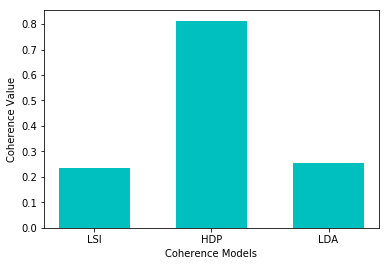

In [24]:
# Figure out which model works best by plotting the results
coherence_models = [lsi_coherence, hdp_coherence, lda_coherence]

r = np.arange(len(coherence_models))
_ = plt.bar(r, coherence_models, width=0.6, tick_label=['LSI', 'HDP', 'LDA'], align='center', color='c')

_ = plt.xlabel('Coherence Models')
_ = plt.ylabel('Coherence Value')

plt.show()
